In [3]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
cars_df=pd.read_csv(r'D:\Data science\s6\Assignment 6\archive\CarPrice_Assignment.csv')
cars_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
cars_df.drop(['car_ID', 'CarName'], axis = 1, inplace=True)
cars_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


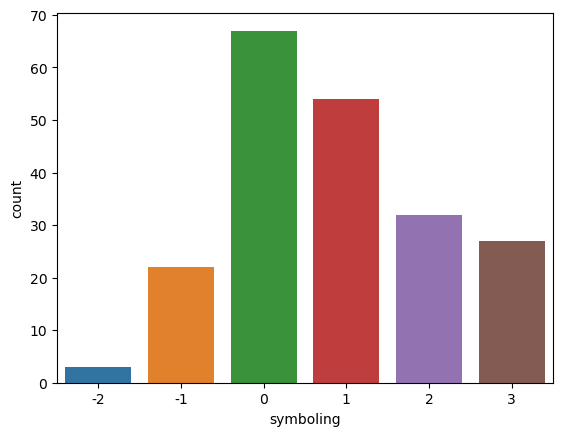

In [8]:
sns.countplot(x='symboling',data=cars_df);

In [9]:
cars_df.drop(cars_df[cars_df['symboling'] == -2].index, inplace=True)

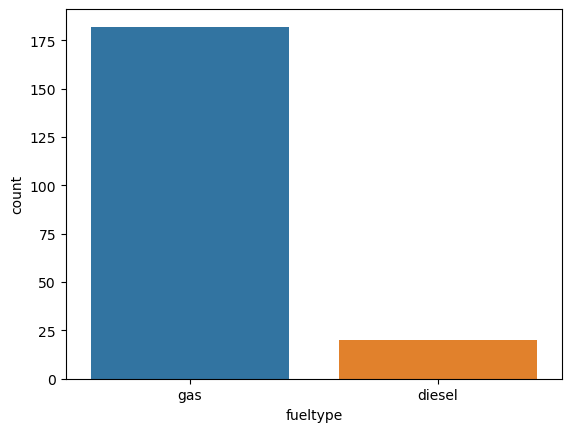

In [10]:
sns.countplot(x='fueltype',data=cars_df);

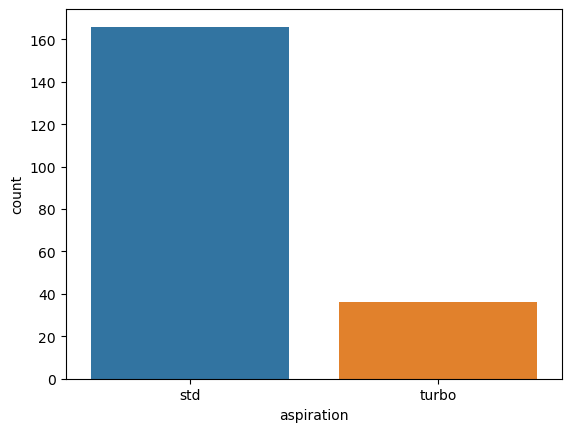

In [11]:
sns.countplot(x='aspiration',data=cars_df);

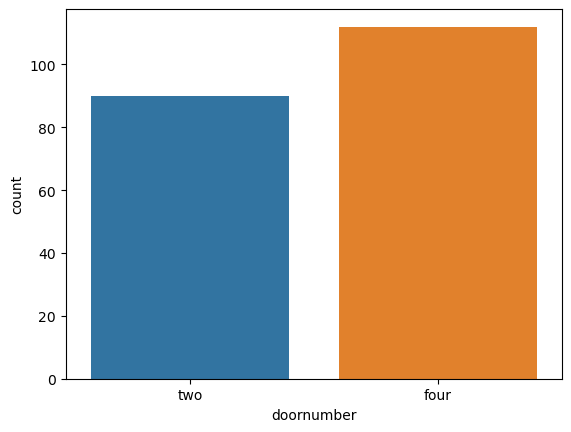

In [12]:
sns.countplot(x='doornumber',data=cars_df);

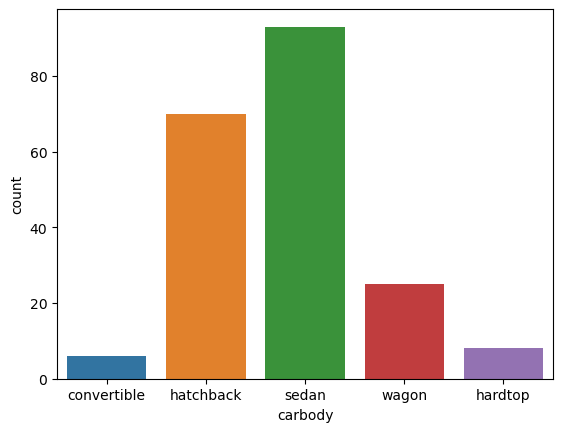

In [13]:
sns.countplot(x='carbody',data=cars_df);

In [14]:
cars_df.drop(cars_df[cars_df['carbody'] == 'convertible'].index, inplace=True)

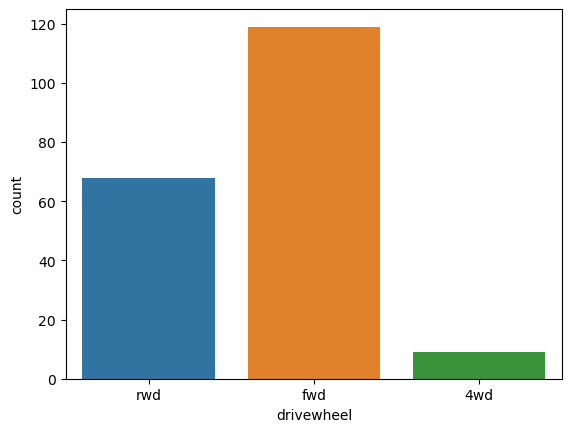

In [15]:
sns.countplot(x='drivewheel',data=cars_df);

In [16]:
cars_df.drop(cars_df[cars_df['drivewheel'] == '4wd'].index, inplace=True)

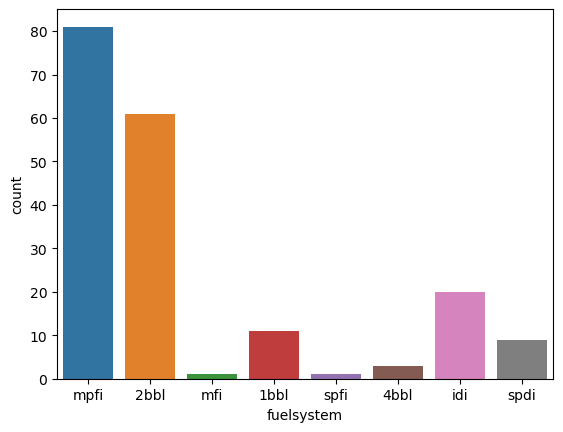

In [17]:
sns.countplot(x='fuelsystem',data=cars_df);

In [18]:
cars_df.drop(cars_df[cars_df['fuelsystem'] == 'mfi'].index, inplace=True)
cars_df.drop(cars_df[cars_df['fuelsystem'] == 'spfi'].index, inplace=True)

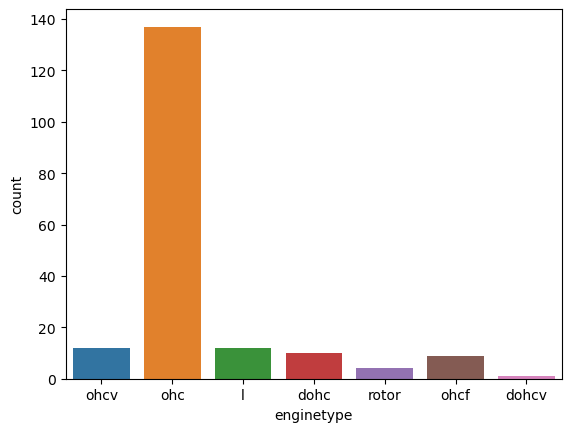

In [19]:
sns.countplot(x='enginetype',data=cars_df);

In [20]:
cars_df.drop(cars_df[cars_df['enginetype'] == 'dohcv'].index, inplace=True)

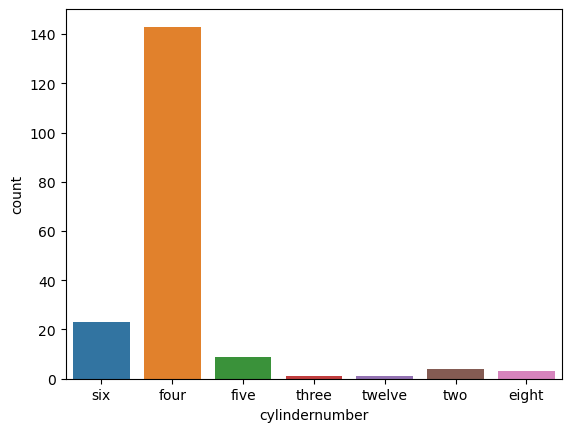

In [21]:
sns.countplot(x='cylindernumber',data=cars_df);

In [22]:
cars_df.drop(cars_df[cars_df['cylindernumber'] == 'three'].index, inplace=True)
cars_df.drop(cars_df[cars_df['cylindernumber'] == 'twelve'].index, inplace=True)

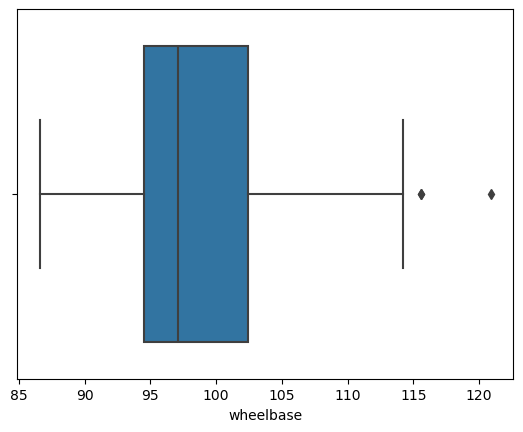

In [23]:
sns.boxplot(x='wheelbase',data=cars_df);

In [24]:
cars_df.drop(cars_df[cars_df['wheelbase'] >= 110].index, inplace=True)

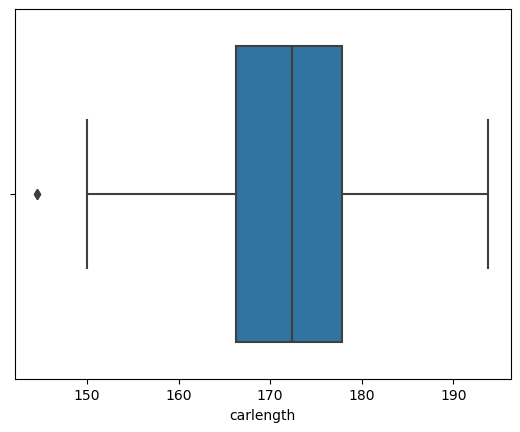

In [25]:
sns.boxplot(x='carlength',data=cars_df);

In [26]:
cars_df.drop(cars_df[cars_df['carlength'] <= 150].index, inplace=True)

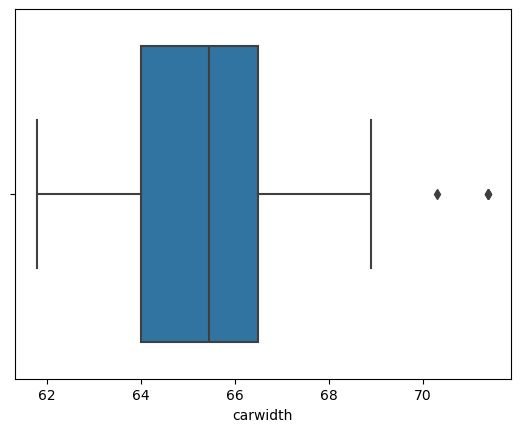

In [27]:
sns.boxplot(x='carwidth',data=cars_df);

In [28]:
cars_df.drop(cars_df[cars_df['carwidth'] >= 70].index, inplace=True)

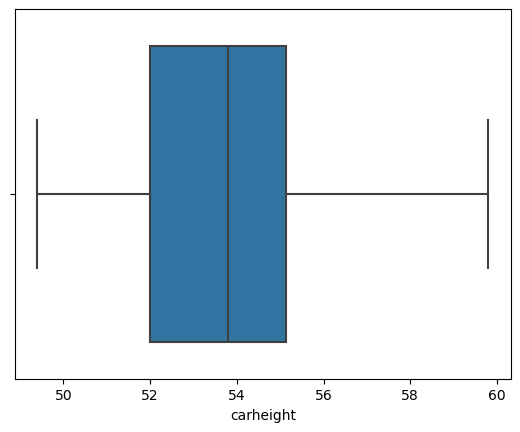

In [29]:
sns.boxplot(x='carheight',data=cars_df);

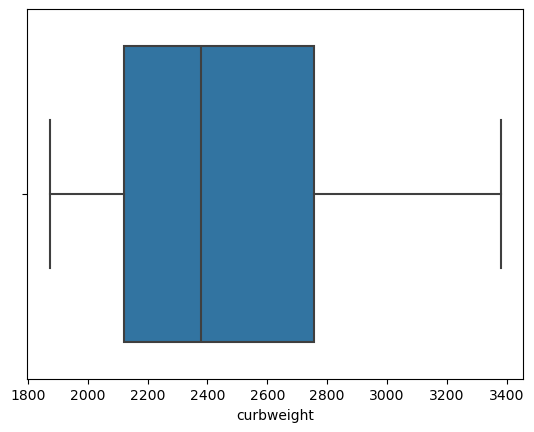

In [30]:
sns.boxplot(x='curbweight',data=cars_df);

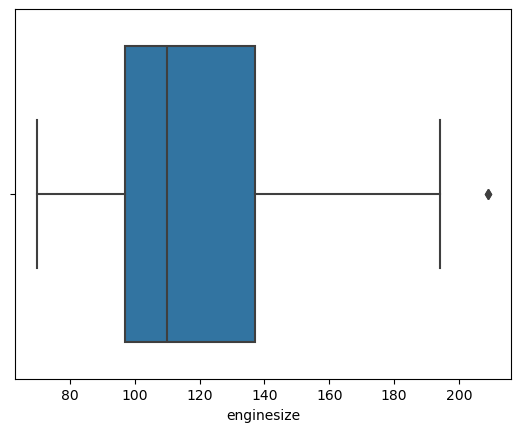

In [31]:
sns.boxplot(x='enginesize',data=cars_df);

In [32]:
cars_df.drop(cars_df[cars_df['enginesize'] >= 140].index, inplace=True)

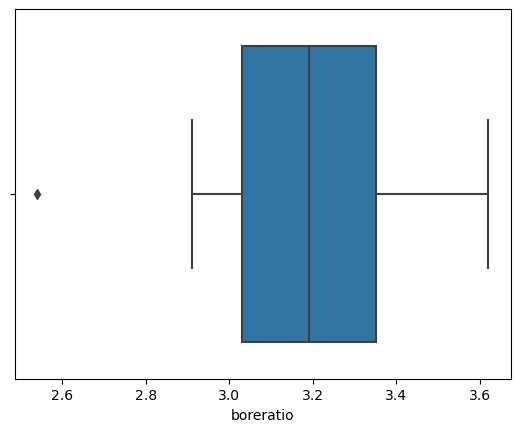

In [33]:
sns.boxplot(x='boreratio',data=cars_df);

In [34]:
cars_df.drop(cars_df[cars_df['boreratio'] <= 2.8].index, inplace=True)

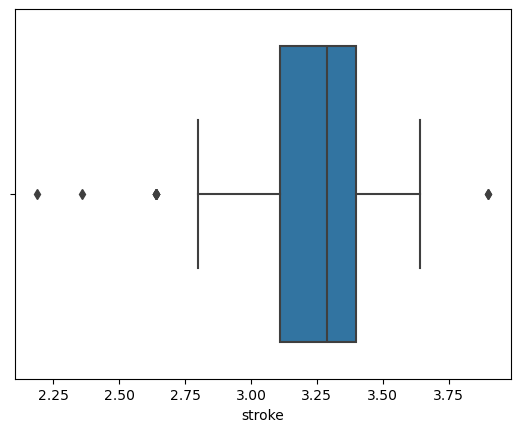

In [35]:
sns.boxplot(x='stroke',data=cars_df);

In [36]:
cars_df.drop(cars_df[cars_df['stroke'] >= 3.5].index, inplace=True)

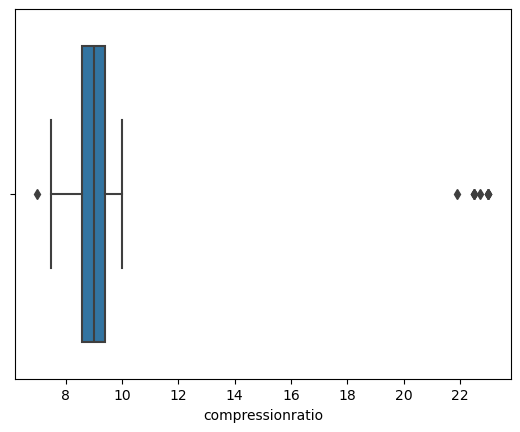

In [37]:
sns.boxplot(x='compressionratio',data=cars_df);

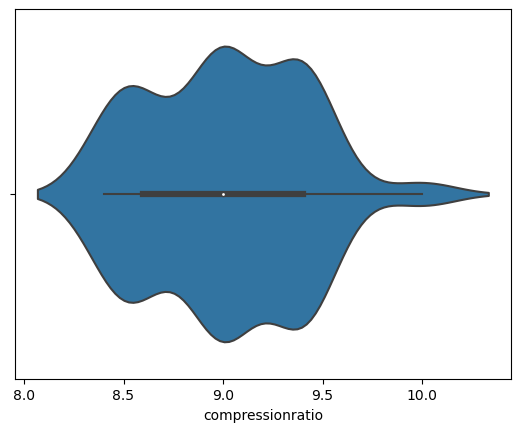

In [81]:
cars_df.drop(cars_df[cars_df['compressionratio'] <= 8].index, inplace=True)
cars_df.drop(cars_df[cars_df['compressionratio'] >= 15].index, inplace=True)
sns.violinplot(x='compressionratio',data=cars_df);

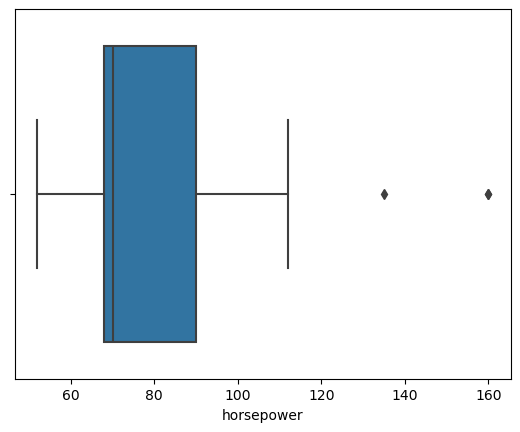

In [39]:
sns.boxplot(x='horsepower',data=cars_df);

In [40]:
cars_df.drop(cars_df[cars_df['horsepower'] >= 120].index, inplace=True)

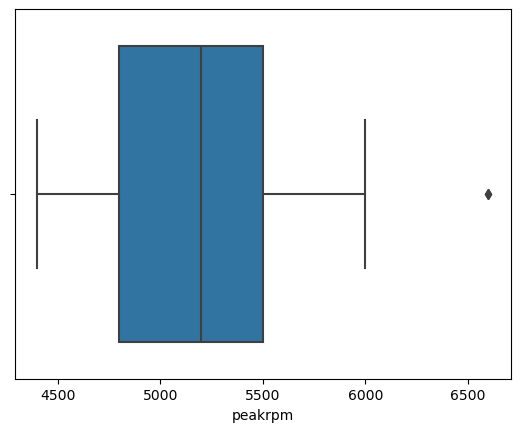

In [41]:
sns.boxplot(x='peakrpm',data=cars_df);

In [42]:
cars_df.drop(cars_df[cars_df['peakrpm'] >= 6000].index, inplace=True)

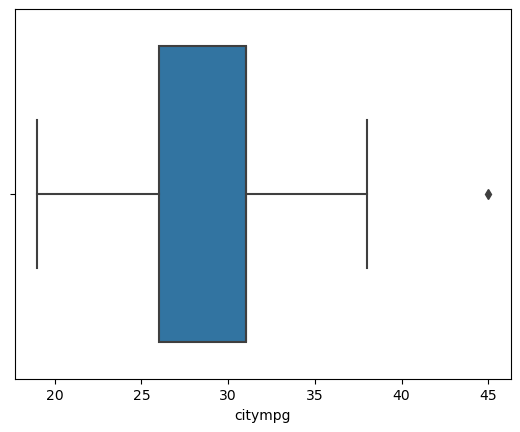

In [43]:
sns.boxplot(x='citympg',data=cars_df);

In [44]:
cars_df.drop(cars_df[cars_df['citympg'] >= 40].index, inplace=True)

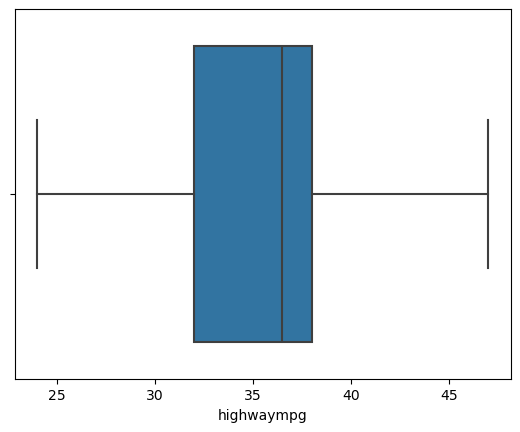

In [45]:
sns.boxplot(x='highwaympg',data=cars_df);

In [46]:
cars_df.drop(cars_df[cars_df['highwaympg'] >= 40].index, inplace=True)

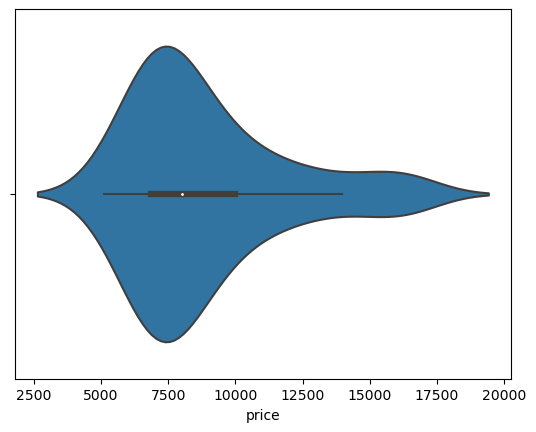

In [47]:
sns.violinplot(x='price',data=cars_df);

In [48]:
cars_df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.863014,96.872603,169.952055,64.919178,53.889041,2244.397260,105.657534,3.244932,3.170274,9.576849,79.753425,5093.150685,27.698630,33.684932,8912.082192
std,0.917652,3.479274,8.499953,1.320423,2.082704,283.101903,12.546823,0.201350,0.274023,2.755462,14.254415,322.567291,3.971023,4.112571,2934.430494
min,-1.000000,93.100000,156.900000,61.800000,49.400000,1876.000000,90.000000,2.970000,2.190000,8.400000,56.000000,4400.000000,19.000000,24.000000,5118.000000
25%,0.000000,94.500000,165.300000,63.800000,52.800000,2004.000000,97.000000,3.080000,3.030000,8.600000,68.000000,4800.000000,25.000000,31.000000,6849.000000
50%,1.000000,95.700000,170.200000,64.400000,54.100000,2209.000000,108.000000,3.190000,3.230000,9.000000,73.000000,5000.000000,28.000000,34.000000,7999.000000
75%,1.000000,98.800000,175.600000,65.500000,55.100000,2395.000000,120.000000,3.390000,3.390000,9.400000,88.000000,5250.000000,31.000000,37.000000,9995.000000
max,3.000000,107.900000,186.700000,68.400000,59.800000,3075.000000,136.000000,3.620000,3.470000,23.000000,110.000000,5800.000000,35.000000,39.000000,16925.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


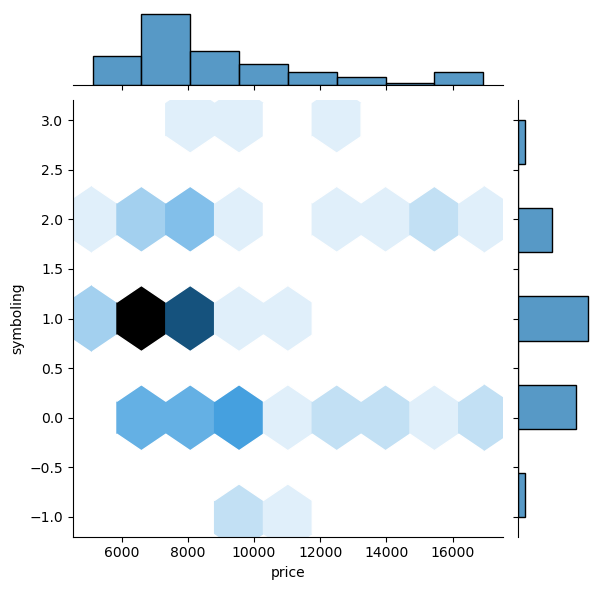

In [49]:
sns.jointplot(x='price',y='symboling',data=cars_df,kind='hex');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


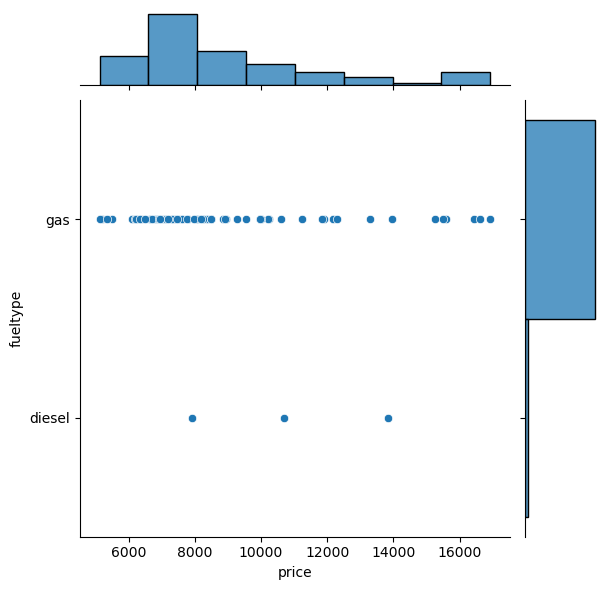

In [50]:
sns.jointplot(x='price',y='fueltype',data=cars_df,kind='scatter');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


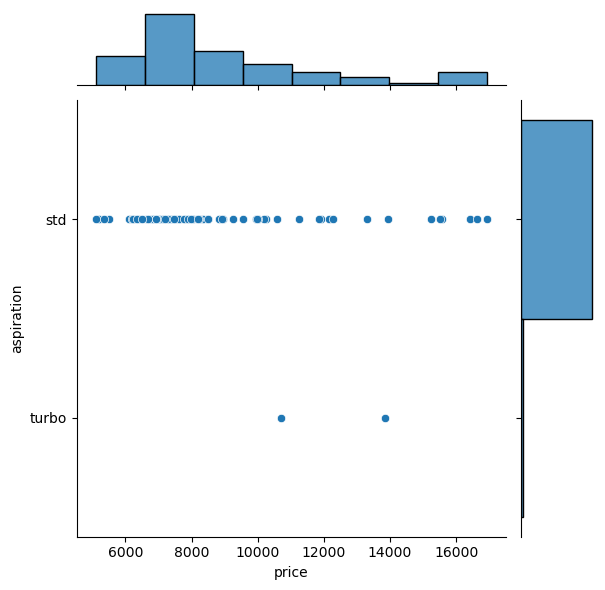

In [51]:
sns.jointplot(x='price',y='aspiration',data=cars_df,kind='scatter');

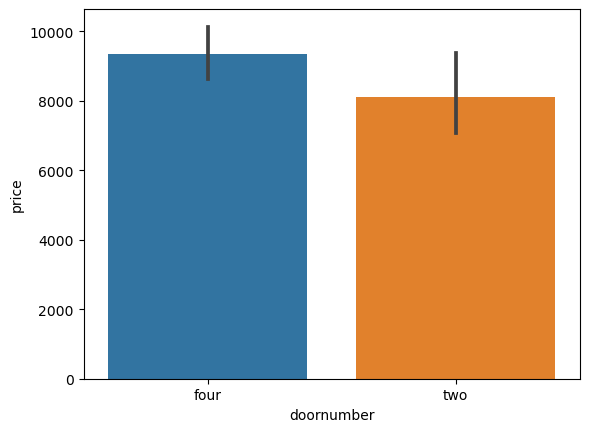

In [52]:
sns.barplot(x='doornumber', y='price',data=cars_df);

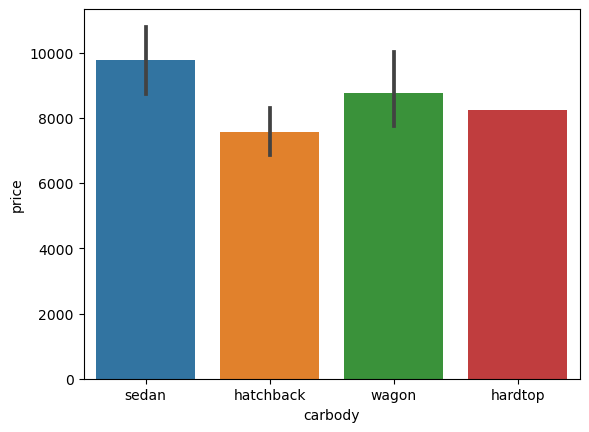

In [53]:
sns.barplot(x='carbody', y='price',data=cars_df);

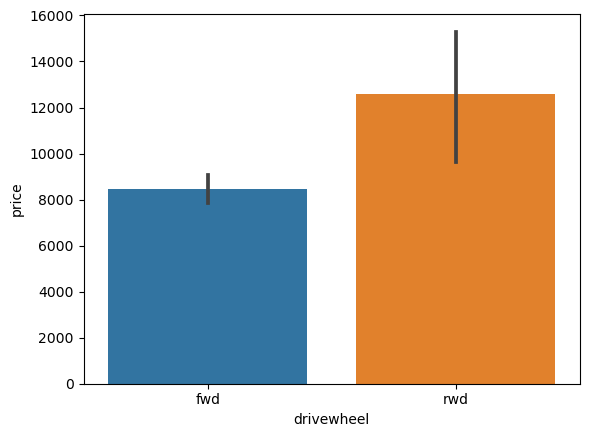

In [54]:
sns.barplot(x='drivewheel', y='price',data=cars_df);

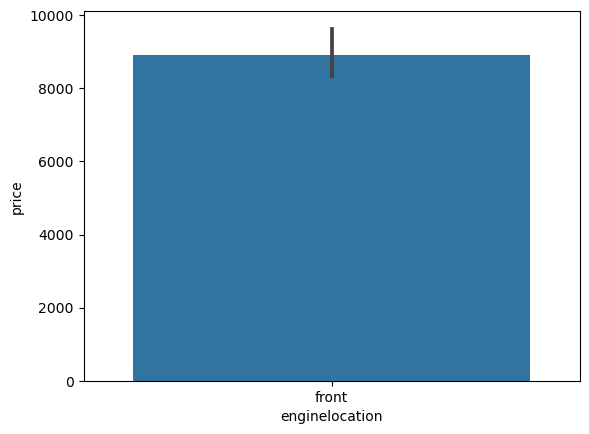

In [61]:
sns.barplot(x='enginelocation', y='price',data=cars_df);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


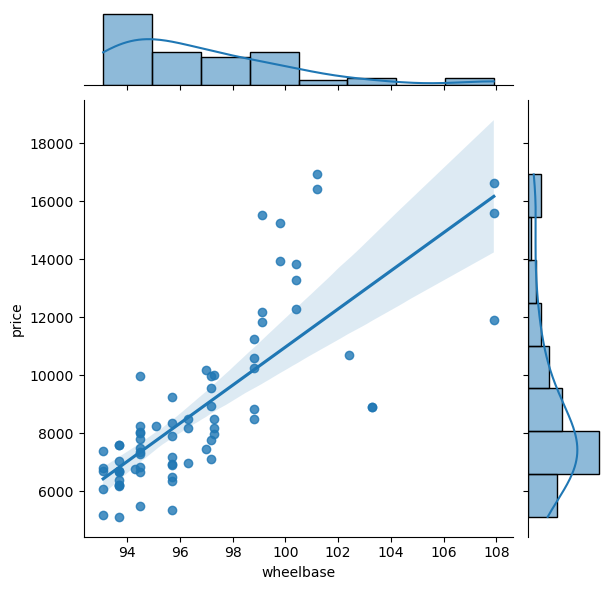

In [63]:
sns.jointplot(x='wheelbase',y='price',data=cars_df,kind='reg');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


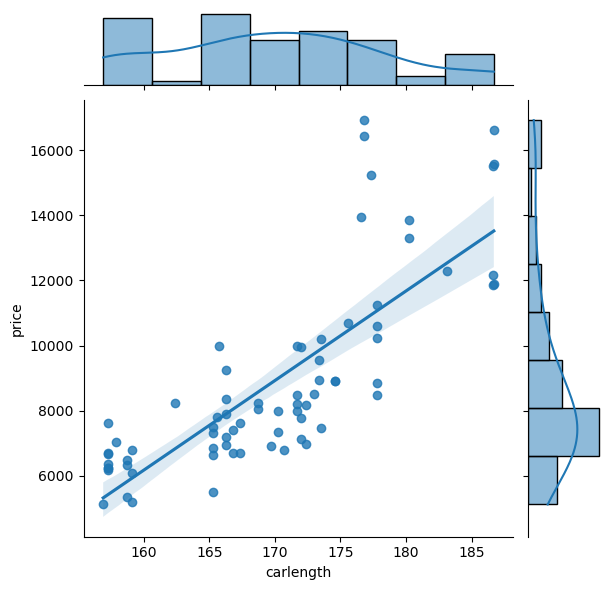

In [64]:
sns.jointplot(x='carlength',y='price',data=cars_df,kind='reg');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


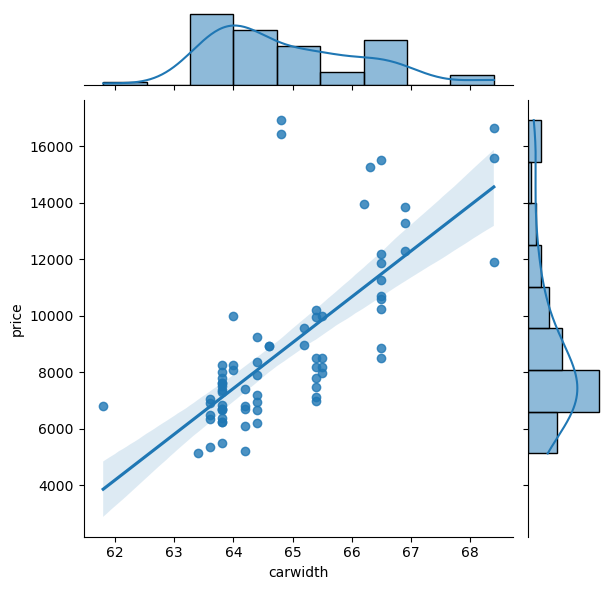

In [65]:
sns.jointplot(x='carwidth',y='price',data=cars_df,kind='reg');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


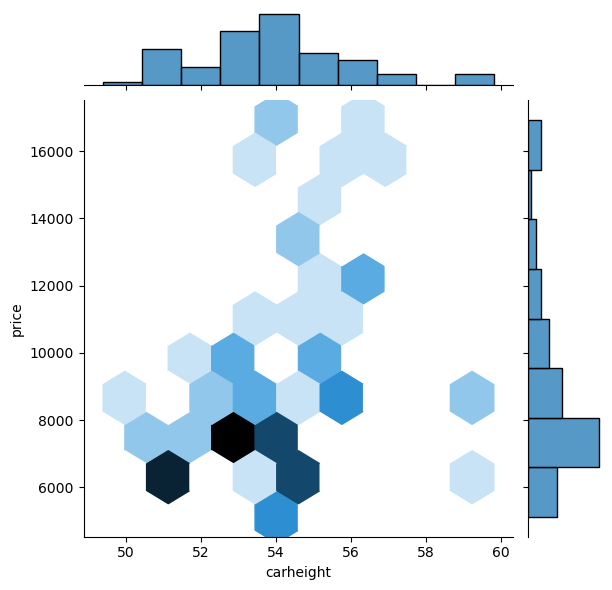

In [67]:
sns.jointplot(x='carheight',y='price',data=cars_df,kind='hex');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


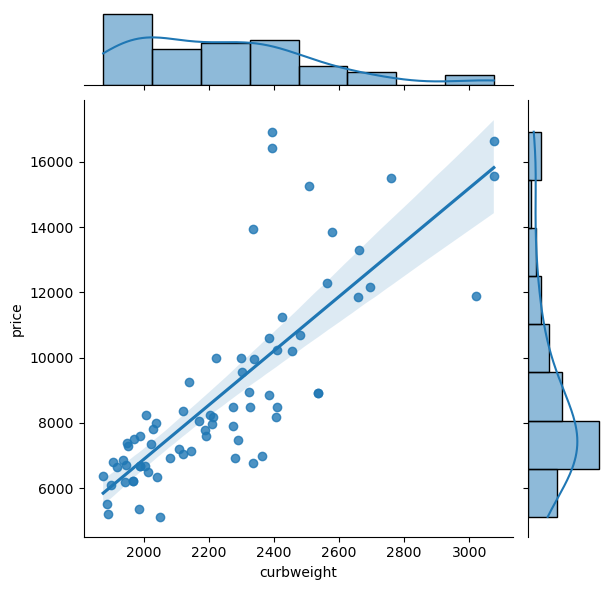

In [68]:
    sns.jointplot(x='curbweight',y='price',data=cars_df,kind='reg');

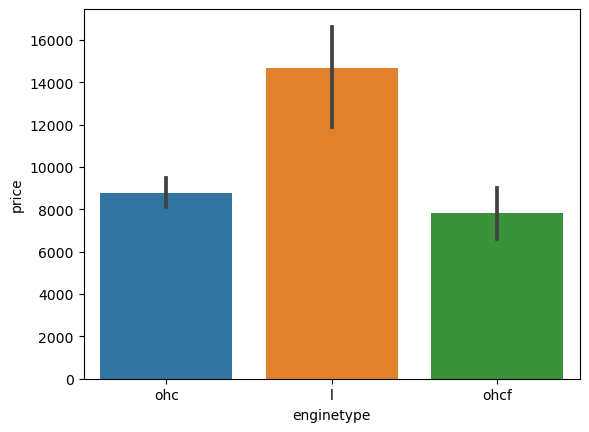

In [69]:
sns.barplot(x='enginetype', y='price',data=cars_df);

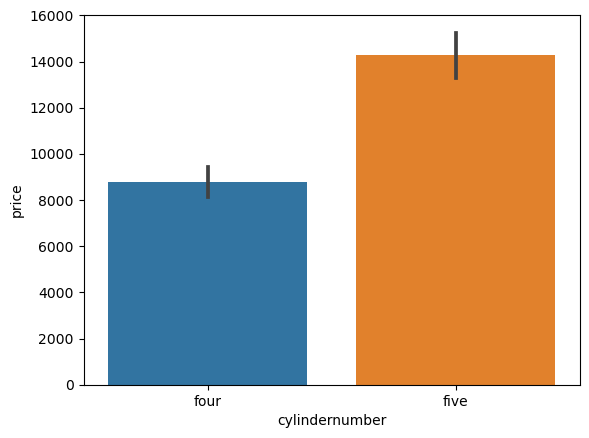

In [70]:
sns.barplot(x='cylindernumber', y='price',data=cars_df);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


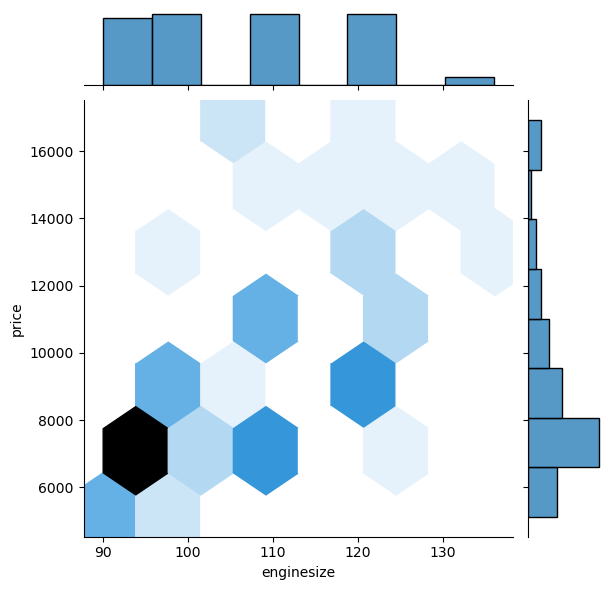

In [72]:
    sns.jointplot(x='enginesize',y='price',data=cars_df,kind='hex');

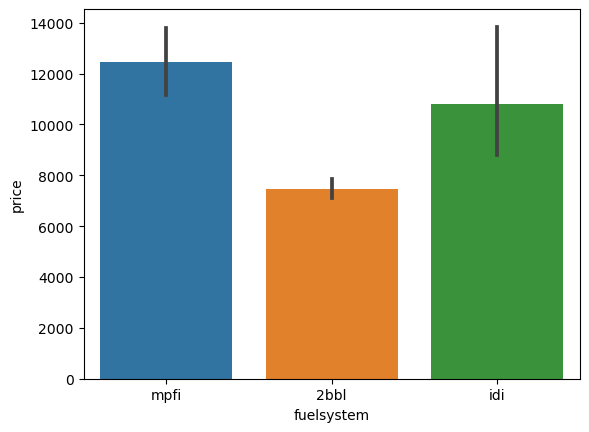

In [73]:
sns.barplot(x='fuelsystem', y='price',data=cars_df);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


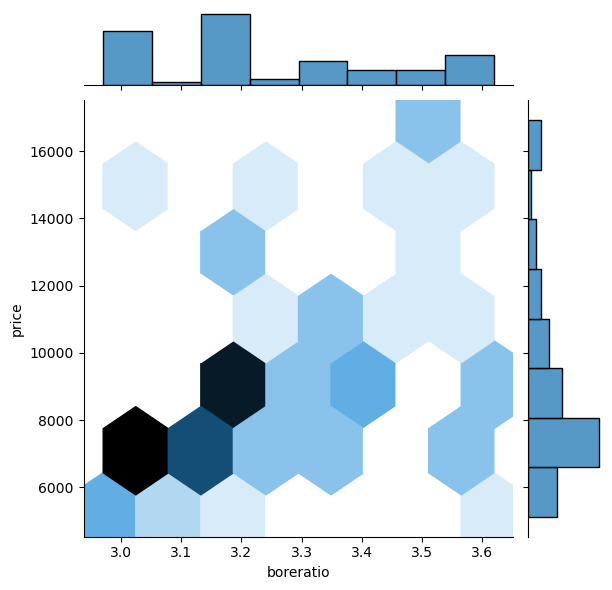

In [76]:
sns.jointplot(x='boreratio',y='price',data=cars_df,kind='hex');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


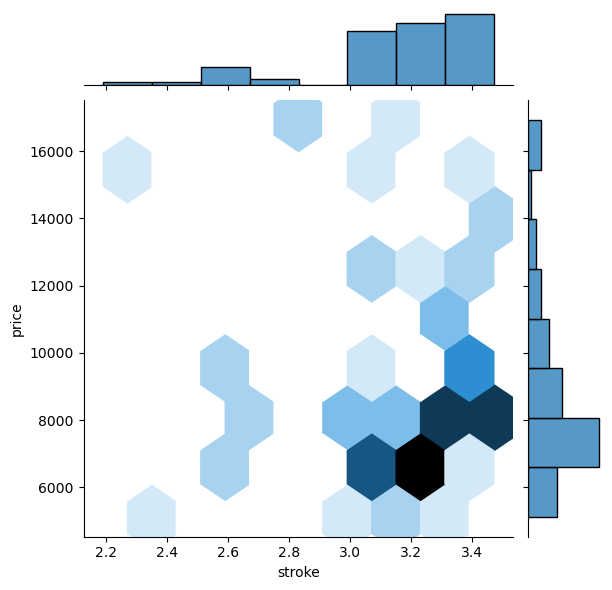

In [78]:
    sns.jointplot(x='stroke',y='price',data=cars_df,kind='hex');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


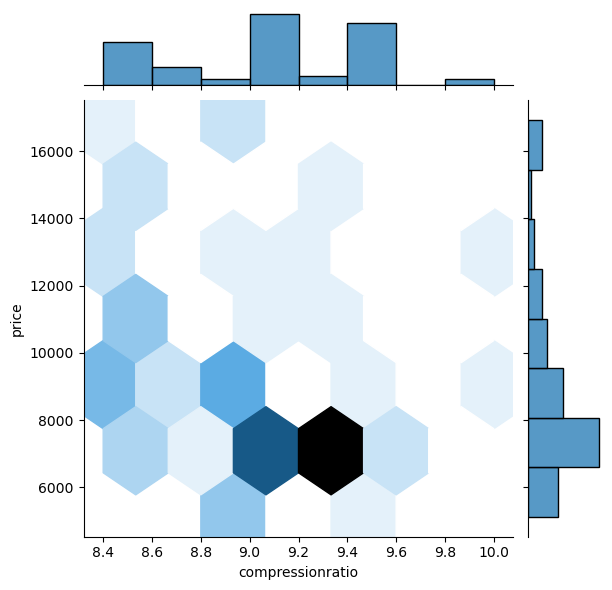

In [82]:
    sns.jointplot(x='compressionratio',y='price',data=cars_df,kind='hex');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


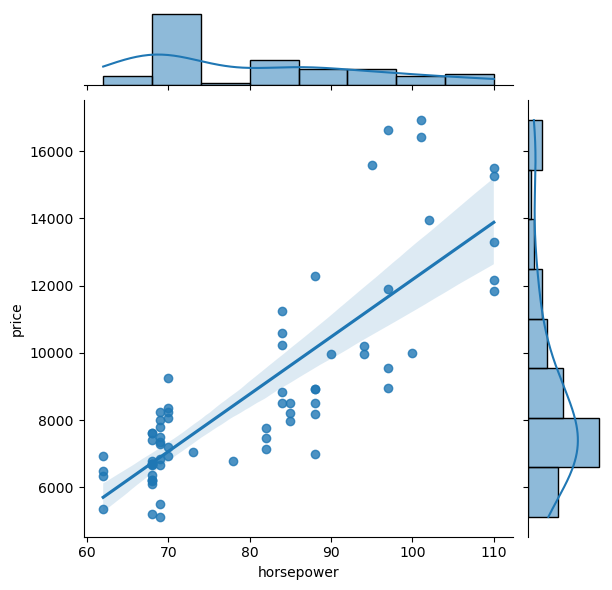

In [83]:
    sns.jointplot(x='horsepower',y='price',data=cars_df,kind='reg');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


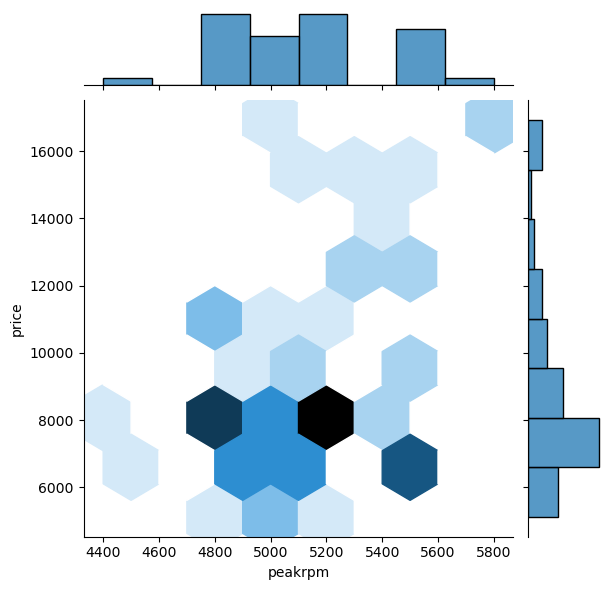

In [85]:
    sns.jointplot(x='peakrpm',y='price',data=cars_df,kind='hex');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


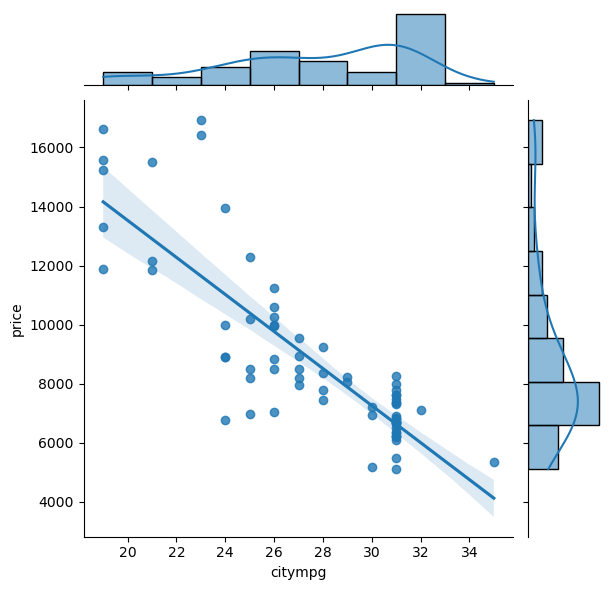

In [86]:
    sns.jointplot(x='citympg',y='price',data=cars_df,kind='reg');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


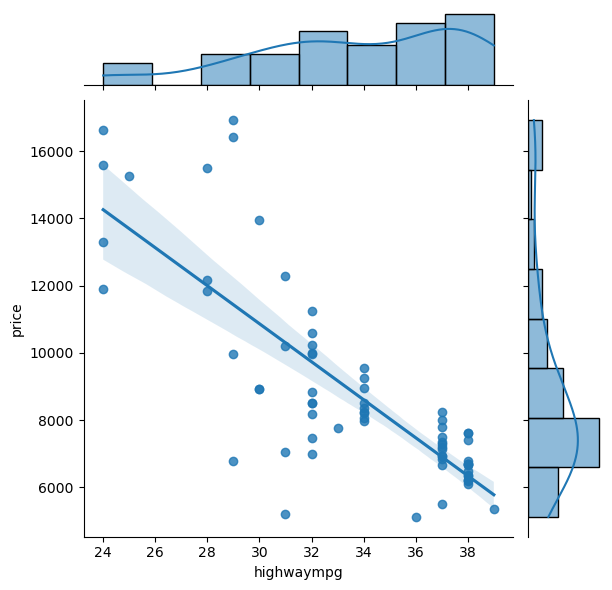

In [87]:
    sns.jointplot(x='highwaympg',y='price',data=cars_df,kind='reg');